[Table of Contents](table_of_contents.ipynb)

# Topic 26.  Rank Reducing Approximations of a Matrix
Author: Name and email goes here
    
    Doug Graff
    aerialgraffics@gmail.com

##  Introduction

Rank-reducing approximations of matrices becomes especially important when dealing with large matrices. Complexity rapidly increases as the size of a matrix increases. The Singular Value Decomposition (SVD) provides useful information that can help us choose what data is most important. This is where rank-reducing approximation comes in. We essentially determine how much of the data in a matrix is essential, and then ignore the rest.
The following explanation is based off of Theorem 7.2 in the Moon and Stirling textbook (pg 377). I will also assume that this is not your first time seeing the SVD.

## Explanation of the theory

Suppose we have an mxn matrix A with rank(A) = r, where m >> n (so it's tall). The SVD can be represented as:
$$A = U \Sigma V^{H} = \begin{bmatrix} U_{1} & U_{2} & \dots & U_{m} \end{bmatrix} \begin{bmatrix} \sigma_{1} &  & 0 \\ & \ddots & \\ 0 &  & \sigma_{n} \end{bmatrix} \begin{bmatrix} V_{1}^{H} \\ V_{2}^{H} \\ \vdots \\ V_{n}^{H} \end{bmatrix}$$

Note: When dealing with real-valued examples, the hermitian transpose can be replaced with a regular transpose.
<br> 
We can also write A as:

$$ A = \sigma_{1}U_{1}V_{1}^{H} + \sigma_{2}U_{2}V_{2}^{H} + \dots + \sigma_{n}U_{n}V_{n}^{H} $$

or equivalently  $$ A = \sum \limits _{i=1} ^{n} \sigma_{i}U_{i}V_{i}^{H} $$

### Now for the reduction and approximation part
Theorem 7.2 says that the matrix $A_k$ is the nearest matrix (closest approximation) of rank k to the matrix A. That is:
$$ min_{rank(B) = k} \lVert A - B \rVert_{2} = \lVert A - A_k \rVert_{2} $$
In other words, if we want a rank k matrix that's the closest approximation to A, we want $A_{k}$ as defined in the next equation.
When the singular values, and corresponding left and right singular vectors (U and V), are ordered from largest to smallest, we can choose to ignore the singular values beyond a threshold, as well as their corresponding singular vectors. We're basically choosing the rank k of our approximation matrix such that:
$$ A_k = \sum \limits _{i=1} ^{k} \sigma_{i}U_{i}V_{i}^{H} = U\Sigma_{k}V^{H}$$
where
$$ \Sigma_{k} = diag(\sigma_{1}, \sigma_{2}, \dots, \sigma_{k}) $$
In so doing, we only get the first k data values.
<br>
HERE'S THE COOLEST PART:
$$ \lVert A - A_k \rVert_{2} = \sigma_{k+1} $$
This is so so so so cool.  This means that we can tell how close our approximation is just by looking at the next singular value after the kth singular value! This also means that we can pre-determine how good we want our approximation to be, and just look over the singular values of A to determine the rank k that will give us the accuracy that we want!
<br>
Note: In this explanation I started by defining A as a tall matrix. A doesn't have to be tall or fat for this to work.  I chose to make it tall to emphasize that this works for a matrix with lots of data.

## Simple Numerical Examples



In [7]:
import numpy as np

# the approximation_rank is the rank k that we can choose.
approximation_rank = 3

A = np.array([[1,2,3,4],
              [5,5,7,8],
              [9,10,11,12],
              [13,14,19,16],
              [1,1,1,3]])

U, Sig, Vh = np.linalg.svd(A)
print("\nSingular Values of A: ", Sig)

u_shape = len(U[:,0])
vh_shape = len(Vh[0,:])

A_k = np.zeros((u_shape, vh_shape))
for k in range(0, approximation_rank):
    # The dimensions require us to use the outer-product
    A_k = A_k + Sig[k]*np.outer(U[:,k].reshape(u_shape,1), Vh[k,:].reshape(1,vh_shape))
print('\n')
print("Look at how close A_k is to the original A matrix!")
print(A_k)
print('\n')
diff = A - A_k
print("The error after our approximation: ", np.linalg.norm(diff, 2))
print('\n')
print("\t\t    sigma at k+1: ", Sig[approximation_rank])
print('\n')


Singular Values of A:  [40.27189232  2.86046229  1.5978984   0.66269553]


Look at how close A_k is to the original A matrix!
[[ 1.28863722  1.6776451   3.01475711  4.03085188]
 [ 4.72188419  5.31060441  6.98578081  7.97027274]
 [ 9.14288824  9.84042002 11.00730543 12.01527305]
 [12.97957652 14.02280929 18.99895581 15.99781697]
 [ 0.88724533  1.12592632  0.99423521  2.98794787]]


The error after our approximation:  0.6626955264257393


		    sigma at k+1:  0.6626955264257398




## An Engineering Application

Matrix reduction can be effectively used to filter out noise from a signal.  The following is an example from Dr Steve Brunton's Youtube lecture on Optimal Truncation.  The link will be included at the bottom of the example. I would encouarge anyone to check out his lecture series on the SVD.  They're concise, clear, and really well done. 
<br>
On to the example:<br>
We'll start with a data matrix X that is decomposed using the SVD.  We define each part of the SVD (U, $\Sigma$, $V^{T}$) with a sinusoidal pattern. We define them as "true" values because we haven't added noise yet. The plot produced by this code will show the clean data.

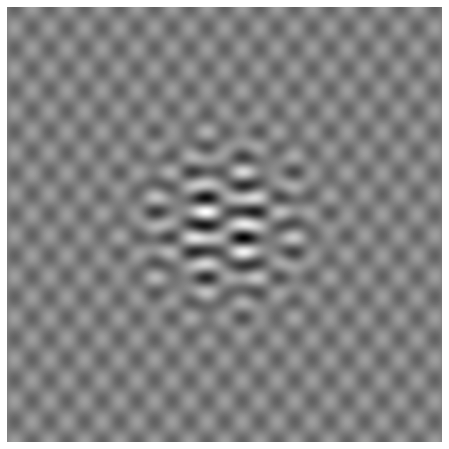

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

# plt.figure()
plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

Now we add some noise to the data matrix X and call it $X_{noisy}$. It is defined as follows:
$$ X_{noisy} = X_s + X_n $$
where $X_s$ refers to the signal part, and $X_n$ refers to the noise part.
The added noise X_n is zero mean gaussian (aka a normal distribution). The next plot shows what that looks like added to the data.

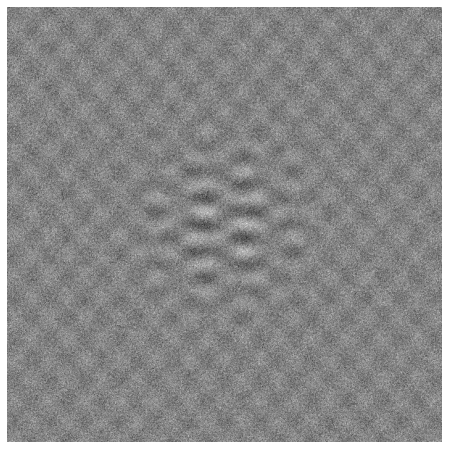

In [2]:
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

The result above is still recognizeable as the original image, but a lot less so. This is the point where we can do a rank reduction and approximate our original matrix. It turns out that (assuming the singular values in $\Sigma$ are in descending order) the signal data is most represented by the largest (aka most significant) singular values and singular vectors. Now some people would want to get as much data as possible, and so they will choose a rank reduction value (how many singular values you're going to use) that will give them 90% of the data. This is what happens when you choose a rank that yields 90% of the data:

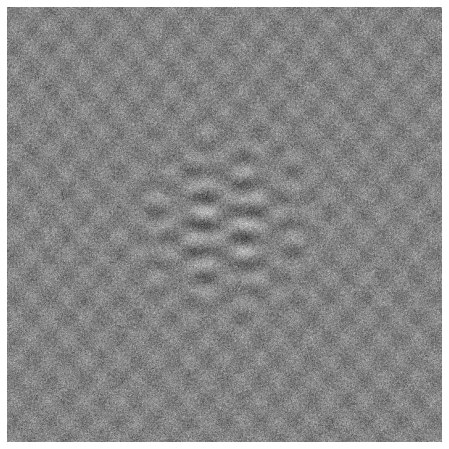

In [5]:
U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
plt.imshow(X90)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

As you can see, the result is something in between the noisy image and the clean image.  It turns out that there is a balance between the signal data and the noise. As we truncate data (truncate sigma values) we shave off data, but also noise. So there is an optimum matrix rank "r" that we can find. I won't discuss it here, but Dr Brunton references an IEEE paper by Gavish and Donoho (2004) that discusses this very topic. The solution differs for square and rectangular matrices. Our example is a square matrix, so we solve for a threshold $\tau$ that we will compare to each sigma value to determine what rank "r" to use. We will only use sigma values above this threshold. By doing this rank reduction optimization, we get:

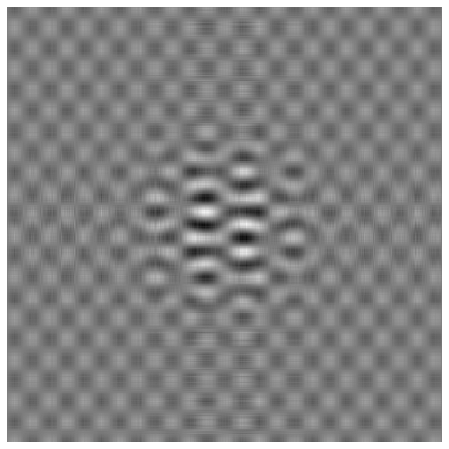

In [6]:
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold
r = np.max(np.where(S > cutoff)) # Keep modes w/ sigma > cutoff

Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]
plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

When comparing with the first "clean" image, we see that it is very similar.  It's still noisy, but it's a lot better. 
## Conclusion
To sum up, using an optimum rank reduction, we were able to filter out a fair amount noise from our data.  <br><br>
Sources:
This is from Moon and Stirling's "Mathematical and Algorithms for Signal Processing" (pg 377).
The link to the Youtube video is: https://www.youtube.com/watch?v=epoHE2rex0g&ab_channel=SteveBrunton
Make sure to check out the rest of his videos, as they've helped me understand the SVD.
This link is for the Gavish and Donoho paper titled "The Optimal Hard Threshold for Singular Values is 4/sqrt(3)" https://ieeexplore-ieee-org.erl.lib.byu.edu/document/6846297

## Challenge Problem

Add a homework assignment that might take 10 minutes to complete.  Make sure you can work the problem yourself, but you do not need to submit a solution to the problem.